In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [24]:
print('total data rows: ',X_train.shape[0]+X_test.shape[0])
print('total data cols: ',X_train.shape[1])

total data rows:  70000
total data cols:  28


In [25]:
#flatten- hd layers ko 1 d array me covert krne k liye

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
model=Sequential()

model.add(Flatten(input_shape=(28, 28))) # shape of data
model.add(Dense(128, activation='relu')) # no need to tell # of i/p features since flatten ka o/p is directly feeded to the dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # when more than 1 nodes in o/p layer, always ue softmx


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy') # sparse_categorical_crossentropy: we wont have to ohe the labels,

In [30]:
history=model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6050 - accuracy: 0.6467 - val_loss: 0.7277 - val_accuracy: 0.8073
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5844 - accuracy: 0.8450 - val_loss: 0.5365 - val_accuracy: 0.8587
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4444 - accuracy: 0.8832 - val_loss: 0.3858 - val_accuracy: 0.8957
Epoch 4/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3254 - accuracy: 0.9164 - val_loss: 0.3105 - val_accuracy: 0.9160
Epoch 5/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2425 - accuracy: 0.9386 - val_loss: 0.2271 - val_accuracy: 0.9431
Epoch 6/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1968 - accuracy: 0.9498 - val_loss: 0.2280 - val_accuracy: 0.9480
Epoch 7/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1587 - accuracy: 0.9590 - val_loss: 0.2116 - val_acc

In [31]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
# probabibilties of being a 0,1,2,3,4,5,6,7,8,9

In [33]:
y_pred=y_prob.argmax(axis=1) # konse index posotion pt value max he

In [34]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
#first img is 7, 2nd is 2, 3rd is 1,...

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.9692

In [38]:
# cnn works even more better on img data

In [39]:
import matplotlib.pyplot as plt


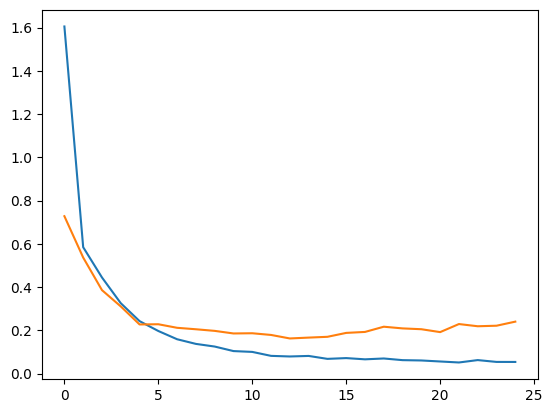

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

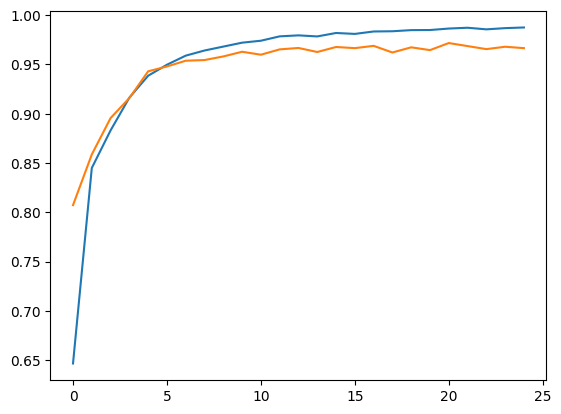

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

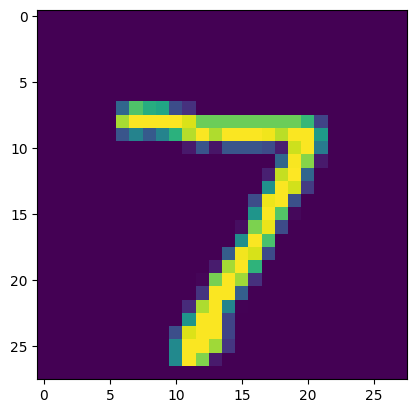

In [46]:
plt.imshow(X_test[0])

In [48]:
model.predict(X_test[0].reshape(1,28,28)) # sneding 1 img of 28x28

1/1 [==============================] - 0s 20ms/step


array([[2.9634680e-24, 4.5601134e-11, 1.0830971e-11, 1.0601346e-14,
        4.2263054e-11, 4.0177177e-20, 0.0000000e+00, 1.0000000e+00,
        1.7433314e-22, 3.4757443e-13]], dtype=float32)

In [51]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 59ms/step


array([7])

In [52]:
#yayyyyyyy!!!!!!!!!!